#  HOUSE PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv('house_data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
4,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     502 non-null    float64
 1   ZN       502 non-null    float64
 2   INDUS    502 non-null    float64
 3   CHAS     502 non-null    int64  
 4   NOX      502 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      502 non-null    float64
 7   DIS      502 non-null    float64
 8   RAD      502 non-null    int64  
 9   TAX      502 non-null    int64  
 10  PTRATIO  502 non-null    float64
 11  B        502 non-null    float64
 12  LSTAT    502 non-null    float64
 13  MEDV     502 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.0 KB


In [5]:
housing['CHAS'].value_counts()

0    467
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,502.000000,502.000000,502.000000,502.000000,502.000000,497.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.640919,11.418327,11.186275,0.069721,0.555125,6.282451,68.584462,3.786276,9.605578,409.364542,18.457570,356.400777,12.705120,22.501992
std,8.630272,23.396912,6.860844,0.254930,0.116190,0.706007,28.246228,2.110753,8.718474,168.701749,2.165787,91.605112,7.142216,9.211294
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082492,0.000000,5.190000,0.000000,0.449000,5.884000,44.550000,2.091150,4.000000,279.250000,17.400000,375.240000,7.125000,16.850000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.167500,5.000000,330.000000,19.100000,391.385000,11.430000,21.200000
75%,3.689387,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.188425,24.000000,666.000000,20.200000,396.225000,17.057500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#to plot data

#%matplotlib inline
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))

# Train Test Splitting Function

In [8]:
#self made split function

import numpy as np
def train_test_splitting(data,test_split_ratio):
    np.random.seed(0)
    suffled=np.random.permutation(len(data))
    test_len_size=int(len(data)*test_split_ratio)
    test_indices=suffled[:test_len_size]
    train_indices=suffled[test_len_size:]
    return data.iloc[test_indices],data.iloc[train_indices]

In [9]:
#test_data,train_data=train_test_splitting(housing,0.25)
#print("length of train data = ",len(train_data))
#print("length of test data = ",len(test_data))

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(housing,test_size=0.25,random_state=0)
print("length of train data = ",len(train_data))
print("length of test data = ",len(test_data))

length of train data =  376
length of test data =  126


In [11]:
train_data['CHAS'].value_counts()

0    348
1     28
Name: CHAS, dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=0)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_indices=housing.loc[train_index]
    strat_test_indices=housing.loc[test_index]

In [13]:
strat_train_indices['CHAS'].value_counts()

0    350
1     26
Name: CHAS, dtype: int64

In [14]:
strat_test_indices['CHAS'].value_counts()

0    117
1      9
Name: CHAS, dtype: int64

In [15]:
350/26

13.461538461538462

In [16]:
117/9

13.0

In [17]:
housing=strat_train_indices.copy()

# correlation

In [18]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.663281
ZN         0.360282
B          0.325642
DIS        0.271086
CHAS       0.189712
AGE       -0.385041
RAD       -0.388590
CRIM      -0.408332
NOX       -0.413309
TAX       -0.466505
INDUS     -0.470816
PTRATIO   -0.507460
LSTAT     -0.751314
Name: MEDV, dtype: float64

In [19]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

# Trying out attribute combination

In [20]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
8,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,51.755700
449,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8,90.085216
43,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6,38.640133
11,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,52.622557
188,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4,55.447200


In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.663281
ZN         0.360282
B          0.325642
DIS        0.271086
CHAS       0.189712
AGE       -0.385041
RAD       -0.388590
CRIM      -0.408332
NOX       -0.413309
TAX       -0.466505
INDUS     -0.470816
PTRATIO   -0.507460
LSTAT     -0.751314
Name: MEDV, dtype: float64

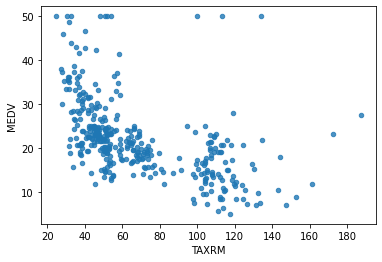

In [23]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

In [24]:
housing_labels=strat_train_indices['MEDV']
housing=strat_train_indices.drop('MEDV',axis=1)

# missing attribute

In [25]:
# let we have some missing data in RM column

# for missing attribute we have 3 ways to get rid of it:
#     1 delete that row from data set
#     housing.dropna(subset='RM')
    
#     2 delete that column 
#     housing.drop("RM",axis=1)
    
#     3 fill missing value with median of that column
#     median = housing['RM'].median()
#     housing['RM'].fillna(median)

In [26]:
#first option 
h=housing.dropna(subset=['RM'])  #this does not change in housing data
h.shape

(371, 13)

In [27]:
# second option
housing.drop('RM',axis=1).shape

(376, 12)

In [28]:
# third option
median=housing['RM'].median()
housing['RM'].fillna(median)

8      6.009
449    7.393
43     6.030
11     5.834
188    7.178
       ...  
412    6.782
309    6.266
428    6.425
17     5.965
272    7.267
Name: RM, Length: 376, dtype: float64

In [29]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,376.000000,376.000000,376.000000,376.000000,376.000000,371.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,3.526278,11.700798,11.103537,0.069149,0.553331,6.255461,68.821809,3.837065,9.523936,409.095745,18.487500,358.767686,12.738644
std,8.171948,23.207446,6.754285,0.254045,0.114154,0.697459,28.225276,2.131171,8.660991,166.133830,2.146247,87.262433,6.989090
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.085947,0.000000,5.190000,0.000000,0.449000,5.874500,43.625000,2.077100,4.000000,284.000000,17.375000,375.300000,7.187500
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.167000,77.500000,3.239250,5.000000,332.500000,19.100000,391.770000,11.465000
75%,3.674807,20.000000,18.100000,0.000000,0.624000,6.617500,94.425000,5.400700,24.000000,666.000000,20.200000,396.217500,17.120000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,36.980000


In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.60420e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.16700e+00, 7.75000e+01, 3.23925e+00, 5.00000e+00, 3.32500e+02,
       1.91000e+01, 3.91770e+02, 1.14650e+01])

In [32]:
x=imputer.transform(housing)       
#this transforms all the missing values with their median of corresponding columns

In [33]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,3.526278,11.700798,11.103537,0.069149,0.553331,6.254285,68.821809,3.837065,9.523936,409.095745,18.487500,358.767686,12.738644
std,8.171948,23.207446,6.754285,0.254045,0.114154,0.692868,28.225276,2.131171,8.660991,166.133830,2.146247,87.262433,6.989090
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.085947,0.000000,5.190000,0.000000,0.449000,5.875000,43.625000,2.077100,4.000000,284.000000,17.375000,375.300000,7.187500
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.167000,77.500000,3.239250,5.000000,332.500000,19.100000,391.770000,11.465000
75%,3.674807,20.000000,18.100000,0.000000,0.624000,6.608500,94.425000,5.400700,24.000000,666.000000,20.200000,396.217500,17.120000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,36.980000


# Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])



In [36]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(376, 13)

# Selecting a desired model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [39]:
some_housing_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [40]:
prepared_data=my_pipeline.transform(some_housing_data)

In [41]:
model.predict(prepared_data)

array([19.556, 17.583, 18.014, 20.068, 36.208])

In [42]:
list(some_labels)

[18.9, 17.8, 16.6, 19.9, 36.4]

# Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [44]:
rmse

1.276823229155328

## Using Better Evaluation technique

In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores

array([2.96530188, 2.85789918, 2.23654276, 2.51930556, 3.75725062,
       3.25402512, 4.20201422, 3.57732007, 3.80755958, 5.22785823])

In [47]:
def print_score(scores):
    print("sores ",scores)
    print("mean ",scores.mean())
    print("Standard deviation ", scores.std())

In [48]:
print_score(rmse_scores)

sores  [2.96530188 2.85789918 2.23654276 2.51930556 3.75725062 3.25402512
 4.20201422 3.57732007 3.80755958 5.22785823]
mean  3.4405077212009316
Standard deviation  0.8322534971050225


## Testing the model

In [49]:
x_test=strat_test_indices.drop('MEDV',axis=1)
y_test=strat_test_indices['MEDV']
x_test_pred=my_pipeline.transform(x_test)
final_pred=model.predict(x_test_pred)
final_mse=mean_squared_error(y_test,final_pred)
final_rmse=np.sqrt(final_mse)

In [50]:
final_rmse

3.1920274047039365